## Football Match Result Prediction - Using Neural Network 1
### Using author's configurations
<p>
<strong>
@author Avinash Rai <br/>
@lastmodified 10/03/2021
</strong>
</p>

In [3]:
import os, sys
import tensorflow as tf
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.layers import Input, Dropout, Dense, Flatten
from tensorflow.keras.optimizers import Adam

from sklearn import metrics
from utilities import getTrainTestDataset, cat_3_confusion_matrix, plot_training_history
import matplotlib.pyplot as plt

In [4]:
X_train_epl, X_test_epl, y_train_epl, y_test_epl = getTrainTestDataset("pickles\dataset-epl.pickle")
X_train_spl, X_test_spl, y_train_spl, y_test_spl = getTrainTestDataset("pickles\dataset-spl.pickle")
print(X_train_epl.shape)
print(X_train_spl.shape)
print(X_test_epl.shape)
print(X_test_spl.shape)

(1772, 29)
(1775, 29)
(874, 29)
(875, 29)


In [5]:
X_train_epl.head()

,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HTGD,ATGD,DiffPts,DiffFormPts,...,AM5,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,DiffLP
1526,-0.867168,-0.149891,-0.368570,-0.491395,-1.030352,-0.160132,-0.539587,0.291926,-0.945089,-1.174424,...,3,0,0,0,0,1,0,0,0,14
157,0.588288,2.467009,1.524303,1.000785,0.743320,2.278740,-0.783542,1.573927,-1.650598,-1.584578,...,3,0,0,0,0,0,0,0,0,7
1574,0.467000,2.162718,0.375059,1.272091,1.393667,1.921832,0.131290,1.024498,-0.560267,-0.969348,...,3,0,0,0,0,0,0,0,0,4
1850,-1.412963,-1.184480,-1.450211,-1.508791,-1.148597,-1.111887,-0.112666,0.169831,-0.047170,0.056036,...,1,0,0,0,0,0,0,0,0,6
38,-0.260728,0.397832,0.645469,-0.423569,-0.498251,0.553684,-0.844531,0.780307,-1.137501,-0.149041,...,0,0,0,0,0,0,0,0,0,15


In [6]:
X_train_spl.head()

,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HTGD,ATGD,DiffPts,DiffFormPts,...,AM5,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,DiffLP
2020,-1.153904,-1.099911,-1.389243,-1.243118,-0.980697,-0.935257,0.067027,-0.012995,-0.048462,-0.132584,...,1,0,0,0,0,0,0,0,0,2
1143,0.694261,0.728530,1.434441,1.436632,0.923569,0.907177,-0.559609,-0.521091,0.016695,-1.185784,...,1,0,0,1,0,0,0,0,0,1
230,-0.865129,-0.528523,-0.798239,-0.262722,-0.861680,-0.578657,-0.160840,-0.295271,-0.309092,0.288696,...,0,0,0,0,0,0,0,0,0,4
1236,-0.114312,-0.299968,-1.257908,-0.720240,0.507011,-0.281490,0.978498,0.325735,0.863741,1.131256,...,3,0,0,0,0,0,0,0,0,-7
157,-0.980639,-0.757078,-0.404237,-0.197362,-1.040205,-1.113557,-0.616575,-0.577546,0.081852,0.288696,...,3,0,0,0,0,0,0,0,0,-2


## Basic Neural Network model

In [7]:
# Build model using Keras Sequential Model
input_shape = ( X_train_epl.shape[1], )
baseModel = Sequential( name="Base_Model" )
baseModel.add( Dense(41, activation='relu', input_shape=input_shape, kernel_initializer="he_normal"  ) )
baseModel.add( Dense(75, activation='relu', kernel_initializer="he_normal" ) )   
baseModel.add( Dense(3 , activation='softmax') )
baseModel.compile( optimizer=Adam(learning_rate=0.00001), 
    loss='sparse_categorical_crossentropy', metrics=['accuracy'] )
baseModel.summary()

Model: "Base_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 41)                1230      
_________________________________________________________________
dense_1 (Dense)              (None, 75)                3150      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 228       
Total params: 4,608
Trainable params: 4,608
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Train
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1 )
trainEpl = baseModel.fit( 
    X_train_epl, 
    y_train_epl, 
    epochs = 500, 
    validation_data = (X_test_epl,y_test_epl), 
    verbose = 2, 
    callbacks = [earlyStopping]
)

Train on 1772 samples, validate on 874 samples
Epoch 1/500
1772/1772 - 0s - loss: 2.5034 - accuracy: 0.4086 - val_loss: 2.4536 - val_accuracy: 0.4279
Epoch 2/500
1772/1772 - 0s - loss: 2.4399 - accuracy: 0.4170 - val_loss: 2.3921 - val_accuracy: 0.4314
Epoch 3/500
1772/1772 - 0s - loss: 2.3802 - accuracy: 0.4182 - val_loss: 2.3318 - val_accuracy: 0.4325
Epoch 4/500
1772/1772 - 0s - loss: 2.3237 - accuracy: 0.4244 - val_loss: 2.2762 - val_accuracy: 0.4348
Epoch 5/500
1772/1772 - 0s - loss: 2.2701 - accuracy: 0.4272 - val_loss: 2.2235 - val_accuracy: 0.4394
Epoch 6/500
1772/1772 - 0s - loss: 2.2192 - accuracy: 0.4300 - val_loss: 2.1732 - val_accuracy: 0.4382
Epoch 7/500
1772/1772 - 0s - loss: 2.1706 - accuracy: 0.4317 - val_loss: 2.1234 - val_accuracy: 0.4439
Epoch 8/500
1772/1772 - 0s - loss: 2.1239 - accuracy: 0.4317 - val_loss: 2.0784 - val_accuracy: 0.4474
Epoch 9/500
1772/1772 - 0s - loss: 2.0801 - accuracy: 0.4345 - val_loss: 2.0344 - val_accuracy: 0.4439
Epoch 10/500
1772/1772 - 0

Epoch 80/500
1772/1772 - 0s - loss: 1.1435 - accuracy: 0.4780 - val_loss: 1.1372 - val_accuracy: 0.4703
Epoch 81/500
1772/1772 - 0s - loss: 1.1406 - accuracy: 0.4797 - val_loss: 1.1349 - val_accuracy: 0.4714
Epoch 82/500
1772/1772 - 0s - loss: 1.1377 - accuracy: 0.4802 - val_loss: 1.1326 - val_accuracy: 0.4748
Epoch 83/500
1772/1772 - 0s - loss: 1.1349 - accuracy: 0.4808 - val_loss: 1.1304 - val_accuracy: 0.4748
Epoch 84/500
1772/1772 - 0s - loss: 1.1326 - accuracy: 0.4836 - val_loss: 1.1284 - val_accuracy: 0.4760
Epoch 85/500
1772/1772 - 0s - loss: 1.1296 - accuracy: 0.4825 - val_loss: 1.1262 - val_accuracy: 0.4748
Epoch 86/500
1772/1772 - 0s - loss: 1.1270 - accuracy: 0.4836 - val_loss: 1.1242 - val_accuracy: 0.4783
Epoch 87/500
1772/1772 - 0s - loss: 1.1245 - accuracy: 0.4842 - val_loss: 1.1222 - val_accuracy: 0.4794
Epoch 88/500
1772/1772 - 0s - loss: 1.1220 - accuracy: 0.4836 - val_loss: 1.1203 - val_accuracy: 0.4760
Epoch 89/500
1772/1772 - 0s - loss: 1.1195 - accuracy: 0.4831 - 

Epoch 159/500
1772/1772 - 0s - loss: 1.0278 - accuracy: 0.5096 - val_loss: 1.0530 - val_accuracy: 0.4863
Epoch 160/500
1772/1772 - 0s - loss: 1.0270 - accuracy: 0.5090 - val_loss: 1.0527 - val_accuracy: 0.4863
Epoch 161/500
1772/1772 - 0s - loss: 1.0265 - accuracy: 0.5096 - val_loss: 1.0520 - val_accuracy: 0.4851
Epoch 162/500
1772/1772 - 0s - loss: 1.0258 - accuracy: 0.5119 - val_loss: 1.0518 - val_accuracy: 0.4897
Epoch 163/500
1772/1772 - 0s - loss: 1.0250 - accuracy: 0.5135 - val_loss: 1.0514 - val_accuracy: 0.4874
Epoch 164/500
1772/1772 - 0s - loss: 1.0245 - accuracy: 0.5113 - val_loss: 1.0509 - val_accuracy: 0.4886
Epoch 165/500
1772/1772 - 0s - loss: 1.0238 - accuracy: 0.5135 - val_loss: 1.0506 - val_accuracy: 0.4874
Epoch 166/500
1772/1772 - 0s - loss: 1.0231 - accuracy: 0.5135 - val_loss: 1.0502 - val_accuracy: 0.4897
Epoch 167/500
1772/1772 - 0s - loss: 1.0225 - accuracy: 0.5141 - val_loss: 1.0497 - val_accuracy: 0.4897
Epoch 168/500
1772/1772 - 0s - loss: 1.0219 - accuracy:

1772/1772 - 0s - loss: 0.9912 - accuracy: 0.5226 - val_loss: 1.0336 - val_accuracy: 0.5080
Epoch 238/500
1772/1772 - 0s - loss: 0.9908 - accuracy: 0.5209 - val_loss: 1.0334 - val_accuracy: 0.5080
Epoch 239/500
1772/1772 - 0s - loss: 0.9904 - accuracy: 0.5231 - val_loss: 1.0332 - val_accuracy: 0.5080
Epoch 240/500
1772/1772 - 0s - loss: 0.9901 - accuracy: 0.5214 - val_loss: 1.0331 - val_accuracy: 0.5080
Epoch 241/500
1772/1772 - 0s - loss: 0.9899 - accuracy: 0.5198 - val_loss: 1.0328 - val_accuracy: 0.5080
Epoch 242/500
1772/1772 - 0s - loss: 0.9895 - accuracy: 0.5214 - val_loss: 1.0327 - val_accuracy: 0.5080
Epoch 243/500
1772/1772 - 0s - loss: 0.9892 - accuracy: 0.5220 - val_loss: 1.0326 - val_accuracy: 0.5080
Epoch 244/500
1772/1772 - 0s - loss: 0.9888 - accuracy: 0.5226 - val_loss: 1.0325 - val_accuracy: 0.5080
Epoch 245/500
1772/1772 - 0s - loss: 0.9885 - accuracy: 0.5220 - val_loss: 1.0324 - val_accuracy: 0.5069
Epoch 246/500
1772/1772 - 0s - loss: 0.9882 - accuracy: 0.5214 - val_

Epoch 316/500
1772/1772 - 0s - loss: 0.9700 - accuracy: 0.5316 - val_loss: 1.0257 - val_accuracy: 0.5092
Epoch 317/500
1772/1772 - 0s - loss: 0.9698 - accuracy: 0.5322 - val_loss: 1.0257 - val_accuracy: 0.5103
Epoch 318/500
1772/1772 - 0s - loss: 0.9697 - accuracy: 0.5316 - val_loss: 1.0256 - val_accuracy: 0.5114
Epoch 319/500
1772/1772 - 0s - loss: 0.9694 - accuracy: 0.5327 - val_loss: 1.0255 - val_accuracy: 0.5114
Epoch 320/500
1772/1772 - 0s - loss: 0.9691 - accuracy: 0.5327 - val_loss: 1.0255 - val_accuracy: 0.5114
Epoch 321/500
1772/1772 - 0s - loss: 0.9689 - accuracy: 0.5333 - val_loss: 1.0253 - val_accuracy: 0.5103
Epoch 322/500
1772/1772 - 0s - loss: 0.9689 - accuracy: 0.5327 - val_loss: 1.0252 - val_accuracy: 0.5092
Epoch 323/500
1772/1772 - 0s - loss: 0.9687 - accuracy: 0.5316 - val_loss: 1.0252 - val_accuracy: 0.5103
Epoch 324/500
1772/1772 - 0s - loss: 0.9684 - accuracy: 0.5333 - val_loss: 1.0251 - val_accuracy: 0.5092
Epoch 325/500
1772/1772 - 0s - loss: 0.9681 - accuracy:

1772/1772 - 0s - loss: 0.9548 - accuracy: 0.5367 - val_loss: 1.0220 - val_accuracy: 0.5092
Epoch 395/500
1772/1772 - 0s - loss: 0.9546 - accuracy: 0.5367 - val_loss: 1.0219 - val_accuracy: 0.5103
Epoch 396/500
1772/1772 - 0s - loss: 0.9545 - accuracy: 0.5361 - val_loss: 1.0221 - val_accuracy: 0.5092
Epoch 397/500
1772/1772 - 0s - loss: 0.9543 - accuracy: 0.5361 - val_loss: 1.0220 - val_accuracy: 0.5114
Epoch 398/500
1772/1772 - 0s - loss: 0.9541 - accuracy: 0.5350 - val_loss: 1.0220 - val_accuracy: 0.5103
Epoch 399/500
1772/1772 - 0s - loss: 0.9540 - accuracy: 0.5361 - val_loss: 1.0217 - val_accuracy: 0.5103
Epoch 400/500
1772/1772 - 0s - loss: 0.9538 - accuracy: 0.5350 - val_loss: 1.0217 - val_accuracy: 0.5080
Epoch 401/500
1772/1772 - 0s - loss: 0.9536 - accuracy: 0.5361 - val_loss: 1.0217 - val_accuracy: 0.5080
Epoch 402/500
1772/1772 - 0s - loss: 0.9534 - accuracy: 0.5361 - val_loss: 1.0217 - val_accuracy: 0.5092
Epoch 403/500
1772/1772 - 0s - loss: 0.9533 - accuracy: 0.5361 - val_

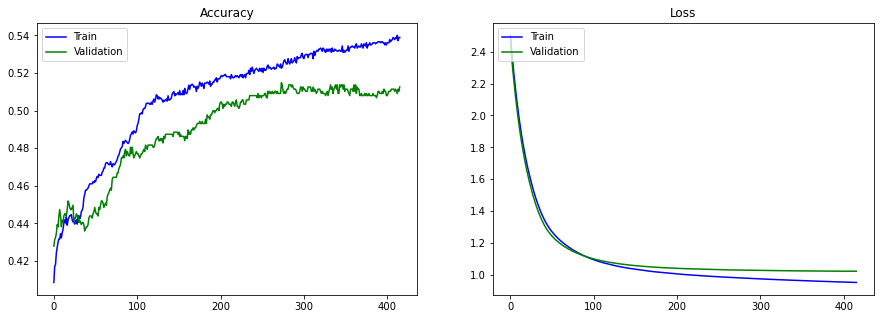

In [9]:
plot_training_history(trainEpl)

## Dynamic Neural Network

In [11]:
def buildNN( name, input_data, learning_rate, layers, dropout_rate ):
    
    input_shape = ( input_data.shape[1], )
    
    nn_model = Sequential( name=name )
    nn_model.add( Input(shape=input_shape ))
    # nn_model.add(Flatten())
    
    for layer in layers:
        nn_model.add( Dense(layer, activation = 'relu', kernel_initializer="he_normal") )
    nn_model.add( Dropout(dropout_rate) )

    # Output    
    nn_model.add( Dense(3 , activation='softmax') )
    nn_model.compile( optimizer=Adam(learning_rate=learning_rate), 
        loss='sparse_categorical_crossentropy', metrics=['accuracy'] )
    nn_model.summary()
    
    return nn_model

### EPL

In [12]:
# EPL[1e-05, ‘41–75–3’, 0.5, 16, 2.8191776275634766, 0.6168224215507507]
epl_best_model = buildNN( "epl_roland-shun-41-75-3", X_train_epl, 0.00001, [41,75], 0.5 )

Model: "epl_roland-shun-41-75-3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 41)                1230      
_________________________________________________________________
dense_4 (Dense)              (None, 75)                3150      
_________________________________________________________________
dropout (Dropout)            (None, 75)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 228       
Total params: 4,608
Trainable params: 4,608
Non-trainable params: 0
_________________________________________________________________


In [13]:
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1 )
training = epl_best_model.fit( 
    X_train_epl, 
    y_train_epl, 
    batch_size = 16, 
    epochs = 500,
    validation_data = (X_test_epl,y_test_epl),
    callbacks = [ earlyStopping ],
    verbose = 2
)

Train on 1772 samples, validate on 874 samples
Epoch 1/500
1772/1772 - 0s - loss: 2.9974 - accuracy: 0.4097 - val_loss: 2.2018 - val_accuracy: 0.4622
Epoch 2/500
1772/1772 - 0s - loss: 2.9284 - accuracy: 0.4114 - val_loss: 2.0837 - val_accuracy: 0.4611
Epoch 3/500
1772/1772 - 0s - loss: 2.9996 - accuracy: 0.3979 - val_loss: 1.9886 - val_accuracy: 0.4634
Epoch 4/500
1772/1772 - 0s - loss: 2.8546 - accuracy: 0.4018 - val_loss: 1.8878 - val_accuracy: 0.4622
Epoch 5/500
1772/1772 - 0s - loss: 2.8740 - accuracy: 0.3911 - val_loss: 1.7988 - val_accuracy: 0.4600
Epoch 6/500
1772/1772 - 0s - loss: 2.6976 - accuracy: 0.3837 - val_loss: 1.7186 - val_accuracy: 0.4600
Epoch 7/500
1772/1772 - 0s - loss: 2.6678 - accuracy: 0.3962 - val_loss: 1.6478 - val_accuracy: 0.4577
Epoch 8/500
1772/1772 - 0s - loss: 2.6484 - accuracy: 0.3849 - val_loss: 1.5855 - val_accuracy: 0.4565
Epoch 9/500
1772/1772 - 0s - loss: 2.5533 - accuracy: 0.4153 - val_loss: 1.5295 - val_accuracy: 0.4565
Epoch 10/500
1772/1772 - 0

Epoch 80/500
1772/1772 - 0s - loss: 1.5782 - accuracy: 0.4464 - val_loss: 1.0889 - val_accuracy: 0.5149
Epoch 81/500
1772/1772 - 0s - loss: 1.6012 - accuracy: 0.4266 - val_loss: 1.0863 - val_accuracy: 0.5126
Epoch 82/500
1772/1772 - 0s - loss: 1.5344 - accuracy: 0.4402 - val_loss: 1.0844 - val_accuracy: 0.5114
Epoch 83/500
1772/1772 - 0s - loss: 1.5253 - accuracy: 0.4436 - val_loss: 1.0840 - val_accuracy: 0.5137
Epoch 84/500
1772/1772 - 0s - loss: 1.5928 - accuracy: 0.4216 - val_loss: 1.0828 - val_accuracy: 0.5103
Epoch 85/500
1772/1772 - 0s - loss: 1.5410 - accuracy: 0.4385 - val_loss: 1.0807 - val_accuracy: 0.5114
Epoch 86/500
1772/1772 - 0s - loss: 1.5361 - accuracy: 0.4312 - val_loss: 1.0783 - val_accuracy: 0.5103
Epoch 87/500
1772/1772 - 0s - loss: 1.5387 - accuracy: 0.4238 - val_loss: 1.0768 - val_accuracy: 0.5092
Epoch 88/500
1772/1772 - 0s - loss: 1.5145 - accuracy: 0.4430 - val_loss: 1.0743 - val_accuracy: 0.5080
Epoch 89/500
1772/1772 - 0s - loss: 1.4693 - accuracy: 0.4537 - 

Epoch 159/500
1772/1772 - 0s - loss: 1.1822 - accuracy: 0.4565 - val_loss: 1.0145 - val_accuracy: 0.5195
Epoch 160/500
1772/1772 - 0s - loss: 1.1789 - accuracy: 0.4509 - val_loss: 1.0138 - val_accuracy: 0.5172
Epoch 161/500
1772/1772 - 0s - loss: 1.1655 - accuracy: 0.4690 - val_loss: 1.0134 - val_accuracy: 0.5172
Epoch 162/500
1772/1772 - 0s - loss: 1.1934 - accuracy: 0.4565 - val_loss: 1.0131 - val_accuracy: 0.5206
Epoch 163/500
1772/1772 - 0s - loss: 1.2022 - accuracy: 0.4498 - val_loss: 1.0126 - val_accuracy: 0.5195
Epoch 164/500
1772/1772 - 0s - loss: 1.2128 - accuracy: 0.4509 - val_loss: 1.0125 - val_accuracy: 0.5195
Epoch 165/500
1772/1772 - 0s - loss: 1.2031 - accuracy: 0.4526 - val_loss: 1.0119 - val_accuracy: 0.5195
Epoch 166/500
1772/1772 - 0s - loss: 1.1572 - accuracy: 0.4701 - val_loss: 1.0115 - val_accuracy: 0.5195
Epoch 167/500
1772/1772 - 0s - loss: 1.1557 - accuracy: 0.4791 - val_loss: 1.0113 - val_accuracy: 0.5195
Epoch 168/500
1772/1772 - 0s - loss: 1.1813 - accuracy:

1772/1772 - 0s - loss: 1.0531 - accuracy: 0.4904 - val_loss: 1.0007 - val_accuracy: 0.5126
Epoch 238/500
1772/1772 - 0s - loss: 1.0494 - accuracy: 0.4938 - val_loss: 1.0006 - val_accuracy: 0.5103
Epoch 239/500
1772/1772 - 0s - loss: 1.0635 - accuracy: 0.4746 - val_loss: 1.0005 - val_accuracy: 0.5092
Epoch 240/500
1772/1772 - 0s - loss: 1.0555 - accuracy: 0.5023 - val_loss: 1.0005 - val_accuracy: 0.5092
Epoch 241/500
1772/1772 - 0s - loss: 1.0542 - accuracy: 0.4825 - val_loss: 1.0004 - val_accuracy: 0.5092
Epoch 242/500
1772/1772 - 0s - loss: 1.0650 - accuracy: 0.4774 - val_loss: 1.0004 - val_accuracy: 0.5103
Epoch 243/500
1772/1772 - 0s - loss: 1.0409 - accuracy: 0.4887 - val_loss: 1.0003 - val_accuracy: 0.5103
Epoch 244/500
1772/1772 - 0s - loss: 1.0600 - accuracy: 0.4808 - val_loss: 1.0004 - val_accuracy: 0.5092
Epoch 245/500
1772/1772 - 0s - loss: 1.0300 - accuracy: 0.4955 - val_loss: 1.0003 - val_accuracy: 0.5092
Epoch 246/500
1772/1772 - 0s - loss: 1.0487 - accuracy: 0.4870 - val_

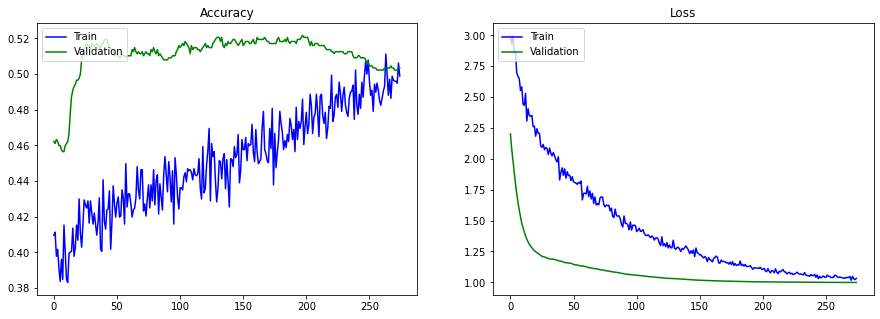

In [14]:
plot_training_history(training)

In [16]:
# Save model
save_path = "saved_models\\" + epl_best_model.name + ".h5"
epl_best_model.save( save_path )

### La Liga

In [17]:
# La Liga[1e-05, ‘41–10–10–10–3’, 0, 32, 0.9817492961883545, 0.5420560836791992]
spl_best_model = buildNN( "spl_roland-shun-41-10-10-10", X_train_spl, 0.00001, [41,10,10,10], 0 )

Model: "spl_roland-shun-41-10-10-10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 41)                1230      
_________________________________________________________________
dense_12 (Dense)             (None, 10)                420       
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 33        
Total params: 1,903
Trainable params: 1,903
Non-trainable params: 0
_____________________________________

In [18]:
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1 )
spl_training = spl_best_model.fit( 
    X_train_spl, 
    y_train_spl,
    batch_size = 32,
    epochs = 500,
    validation_data = (X_test_spl, y_test_spl),
    callbacks = [ earlyStopping ],
    verbose = 2
)

Train on 1775 samples, validate on 875 samples
Epoch 1/500
1775/1775 - 0s - loss: 1.9249 - accuracy: 0.2862 - val_loss: 1.8151 - val_accuracy: 0.3120
Epoch 2/500
1775/1775 - 0s - loss: 1.8917 - accuracy: 0.2856 - val_loss: 1.7853 - val_accuracy: 0.3097
Epoch 3/500
1775/1775 - 0s - loss: 1.8608 - accuracy: 0.2845 - val_loss: 1.7575 - val_accuracy: 0.3109
Epoch 4/500
1775/1775 - 0s - loss: 1.8315 - accuracy: 0.2856 - val_loss: 1.7307 - val_accuracy: 0.3109
Epoch 5/500
1775/1775 - 0s - loss: 1.8031 - accuracy: 0.2851 - val_loss: 1.7059 - val_accuracy: 0.3109
Epoch 6/500
1775/1775 - 0s - loss: 1.7765 - accuracy: 0.2868 - val_loss: 1.6816 - val_accuracy: 0.3154
Epoch 7/500
1775/1775 - 0s - loss: 1.7508 - accuracy: 0.2873 - val_loss: 1.6582 - val_accuracy: 0.3177
Epoch 8/500
1775/1775 - 0s - loss: 1.7261 - accuracy: 0.2873 - val_loss: 1.6359 - val_accuracy: 0.3189
Epoch 9/500
1775/1775 - 0s - loss: 1.7026 - accuracy: 0.2873 - val_loss: 1.6148 - val_accuracy: 0.3223
Epoch 10/500
1775/1775 - 0

Epoch 80/500
1775/1775 - 0s - loss: 1.0491 - accuracy: 0.4901 - val_loss: 1.0505 - val_accuracy: 0.4754
Epoch 81/500
1775/1775 - 0s - loss: 1.0477 - accuracy: 0.4901 - val_loss: 1.0494 - val_accuracy: 0.4754
Epoch 82/500
1775/1775 - 0s - loss: 1.0465 - accuracy: 0.4907 - val_loss: 1.0483 - val_accuracy: 0.4754
Epoch 83/500
1775/1775 - 0s - loss: 1.0452 - accuracy: 0.4924 - val_loss: 1.0473 - val_accuracy: 0.4754
Epoch 84/500
1775/1775 - 0s - loss: 1.0440 - accuracy: 0.4941 - val_loss: 1.0463 - val_accuracy: 0.4777
Epoch 85/500
1775/1775 - 0s - loss: 1.0428 - accuracy: 0.4946 - val_loss: 1.0454 - val_accuracy: 0.4766
Epoch 86/500
1775/1775 - 0s - loss: 1.0416 - accuracy: 0.4958 - val_loss: 1.0444 - val_accuracy: 0.4777
Epoch 87/500
1775/1775 - 0s - loss: 1.0405 - accuracy: 0.4958 - val_loss: 1.0435 - val_accuracy: 0.4789
Epoch 88/500
1775/1775 - 0s - loss: 1.0394 - accuracy: 0.4963 - val_loss: 1.0427 - val_accuracy: 0.4800
Epoch 89/500
1775/1775 - 0s - loss: 1.0383 - accuracy: 0.4958 - 

Epoch 159/500
1775/1775 - 0s - loss: 1.0004 - accuracy: 0.5110 - val_loss: 1.0166 - val_accuracy: 0.4880
Epoch 160/500
1775/1775 - 0s - loss: 1.0001 - accuracy: 0.5115 - val_loss: 1.0165 - val_accuracy: 0.4880
Epoch 161/500
1775/1775 - 0s - loss: 0.9998 - accuracy: 0.5110 - val_loss: 1.0164 - val_accuracy: 0.4880
Epoch 162/500
1775/1775 - 0s - loss: 0.9996 - accuracy: 0.5110 - val_loss: 1.0162 - val_accuracy: 0.4880
Epoch 163/500
1775/1775 - 0s - loss: 0.9993 - accuracy: 0.5110 - val_loss: 1.0160 - val_accuracy: 0.4880
Epoch 164/500
1775/1775 - 0s - loss: 0.9991 - accuracy: 0.5104 - val_loss: 1.0159 - val_accuracy: 0.4880
Epoch 165/500
1775/1775 - 0s - loss: 0.9989 - accuracy: 0.5104 - val_loss: 1.0158 - val_accuracy: 0.4880
Epoch 166/500
1775/1775 - 0s - loss: 0.9986 - accuracy: 0.5110 - val_loss: 1.0157 - val_accuracy: 0.4880
Epoch 167/500
1775/1775 - 0s - loss: 0.9984 - accuracy: 0.5099 - val_loss: 1.0155 - val_accuracy: 0.4880
Epoch 168/500
1775/1775 - 0s - loss: 0.9982 - accuracy:

1775/1775 - 0s - loss: 0.9856 - accuracy: 0.5172 - val_loss: 1.0113 - val_accuracy: 0.4949
Epoch 238/500
1775/1775 - 0s - loss: 0.9855 - accuracy: 0.5172 - val_loss: 1.0113 - val_accuracy: 0.4949
Epoch 239/500
1775/1775 - 0s - loss: 0.9854 - accuracy: 0.5172 - val_loss: 1.0113 - val_accuracy: 0.4949
Epoch 240/500
1775/1775 - 0s - loss: 0.9852 - accuracy: 0.5172 - val_loss: 1.0113 - val_accuracy: 0.4949
Epoch 241/500
1775/1775 - 0s - loss: 0.9851 - accuracy: 0.5172 - val_loss: 1.0112 - val_accuracy: 0.4949
Epoch 242/500
1775/1775 - 0s - loss: 0.9849 - accuracy: 0.5172 - val_loss: 1.0112 - val_accuracy: 0.4949
Epoch 243/500
1775/1775 - 0s - loss: 0.9848 - accuracy: 0.5172 - val_loss: 1.0111 - val_accuracy: 0.4949
Epoch 244/500
1775/1775 - 0s - loss: 0.9847 - accuracy: 0.5172 - val_loss: 1.0111 - val_accuracy: 0.4949
Epoch 245/500
1775/1775 - 0s - loss: 0.9845 - accuracy: 0.5172 - val_loss: 1.0111 - val_accuracy: 0.4949
Epoch 246/500
1775/1775 - 0s - loss: 0.9844 - accuracy: 0.5172 - val_

Epoch 316/500
1775/1775 - 0s - loss: 0.9770 - accuracy: 0.5200 - val_loss: 1.0098 - val_accuracy: 0.4971
Epoch 317/500
1775/1775 - 0s - loss: 0.9770 - accuracy: 0.5206 - val_loss: 1.0098 - val_accuracy: 0.4971
Epoch 318/500
1775/1775 - 0s - loss: 0.9769 - accuracy: 0.5200 - val_loss: 1.0098 - val_accuracy: 0.4971
Epoch 319/500
1775/1775 - 0s - loss: 0.9768 - accuracy: 0.5200 - val_loss: 1.0097 - val_accuracy: 0.4971
Epoch 320/500
1775/1775 - 0s - loss: 0.9767 - accuracy: 0.5217 - val_loss: 1.0098 - val_accuracy: 0.4971
Epoch 321/500
1775/1775 - 0s - loss: 0.9766 - accuracy: 0.5211 - val_loss: 1.0097 - val_accuracy: 0.4971
Epoch 322/500
1775/1775 - 0s - loss: 0.9765 - accuracy: 0.5206 - val_loss: 1.0097 - val_accuracy: 0.4971
Epoch 323/500
1775/1775 - 0s - loss: 0.9764 - accuracy: 0.5206 - val_loss: 1.0097 - val_accuracy: 0.4983
Epoch 324/500
1775/1775 - 0s - loss: 0.9763 - accuracy: 0.5211 - val_loss: 1.0097 - val_accuracy: 0.4983
Epoch 325/500
1775/1775 - 0s - loss: 0.9763 - accuracy:

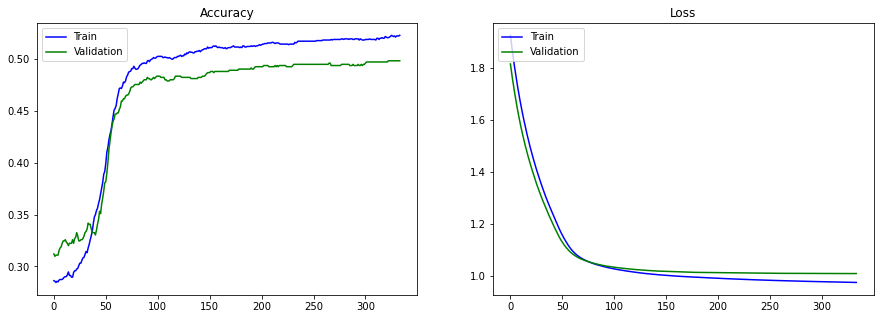

In [19]:
plot_training_history(spl_training)

In [20]:
# Save model
save_path = "saved_models\\" + spl_best_model.name + ".h5"
spl_best_model.save( save_path )